In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# StratiFiedKFold StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, classification_report, roc_curve, log_loss
import warnings
warnings.filterwarnings("ignore");

RAND = 10

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [6]:
df.shape

(73799, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [8]:
df.education.isna().sum()/df.shape[0]*100

0.41599479667746175

In [9]:
df.education.unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD', nan], dtype=object)

In [10]:
ed_mode = df.education.mode()[0]
df.education = df.education.fillna(ed_mode)

In [11]:
df.describe()


,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [12]:
df.nunique()

client_id           73799
app_date              120
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
score_bki           69096
bki_request_cnt        38
region_rating           7
home_address            3
work_address            3
income                966
sna                     4
first_time              4
foreign_passport        2
default                 2
dtype: int64

In [13]:
df.home_address.unique()

array([1, 2, 3])

In [14]:
df[['home_address', 'work_address']] = df[['home_address', 'work_address']].astype(object)

In [15]:
df.describe(include=object)

,app_date,education,sex,car,car_type,home_address,work_address,foreign_passport
count,73799,73799,73799,73799,73799,73799,73799,73799
unique,120,5,2,2,2,3,3,2
top,18MAR2014,SCH,F,N,N,2,3,N
freq,1018,39167,41562,49832,59791,39956,44959,62733


# 2 Exploratory data analysis

**gipoteses**
* age of good borrowers is biger
* education depends on age higher ed and age are characteristics of good borrowers
* good_work = 0 is a bad flag for borrower
* good borrowers salary is bigger then bad
* score_bki is foward depends on default the lesser is score the more good is borrower

## 2.1 Target
At the start analysis of aimed variable is nessesary

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

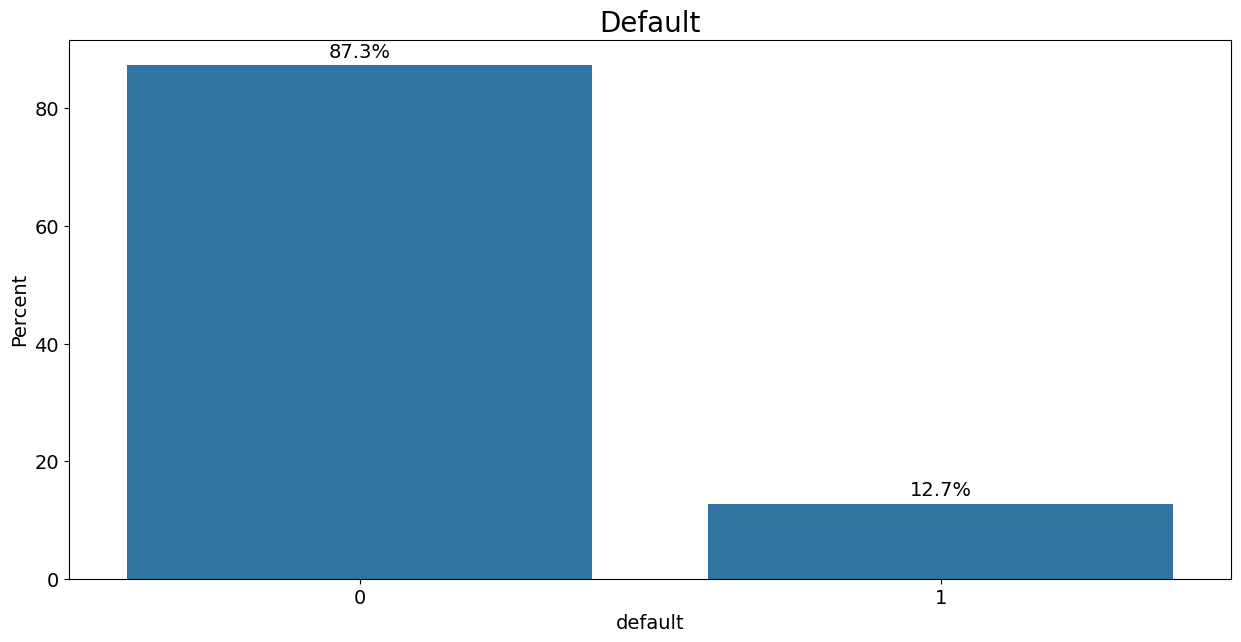

In [16]:
#normalizing by scale
norm_target = (df
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15,7))
ax=sns.barplot(x=norm_target.index, y='percent', data=norm_target)

#noticing every col and writing value
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()), #xy coordinates
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points', #text pozition
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Percent', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## 2.2 age gypotese

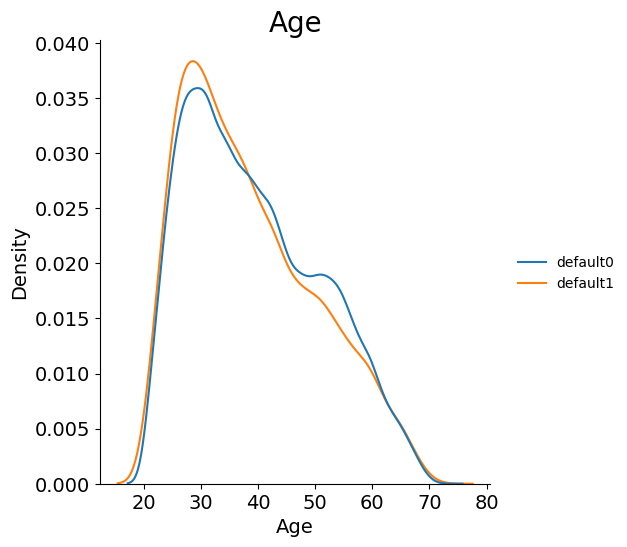

In [17]:
sns.displot(
    {
        "default0": df[df.default == 0].age,
        "default1": df[df.default == 1].age
    },
    kind = "kde",
    common_norm=False #indeendent normalization of each subset
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [18]:
df.groupby('default')['age'].median()

default
0    38.0
1    36.0
Name: age, dtype: float64

In [19]:
df.groupby('default')['age'].mean()

default
0    39.390504
1    38.525395
Name: age, dtype: float64

In [20]:
df.groupby('default')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,age
0,0,31
1,1,26


**moda** shows to us difference in 5 years!

## 2.3 Education gypotese

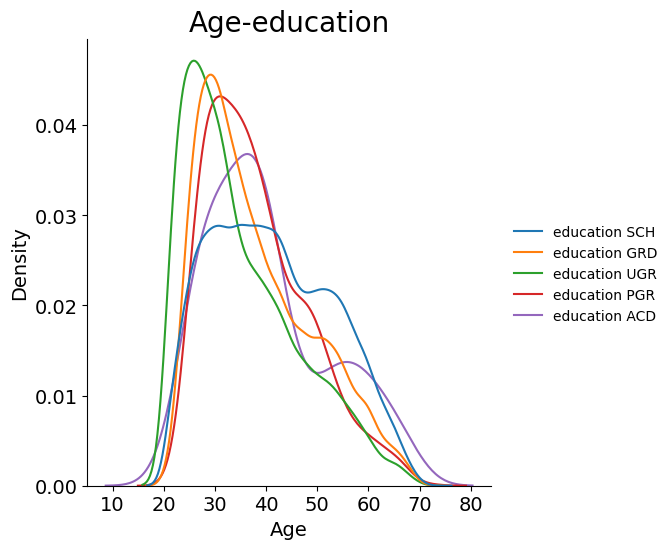

In [21]:
sns.displot(
    {
        "education SCH": df[df.education == 'SCH'].age,
        "education GRD": df[df.education == 'GRD'].age,
        "education UGR": df[df.education == 'UGR'].age,
        "education PGR": df[df.education == 'PGR'].age,
        "education ACD": df[df.education == 'ACD'].age,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-education', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

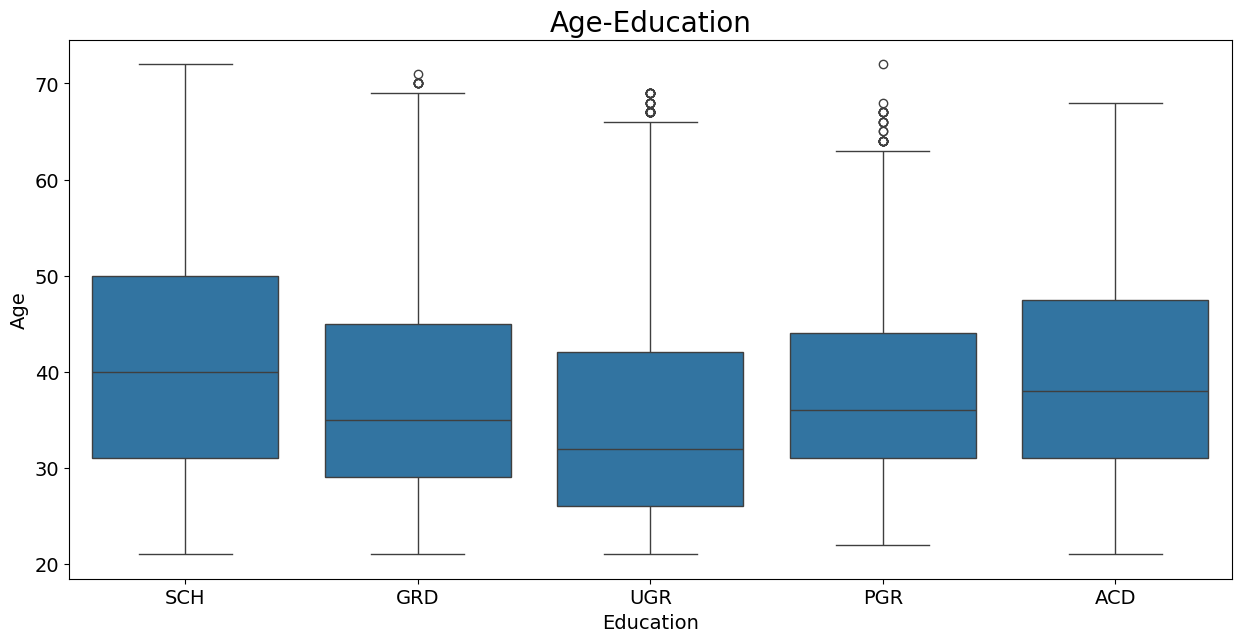

In [22]:
plt.figure(figsize=(15,7))

sns.boxplot(x='education', y='age', data=df)

plt.title('Age-Education', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

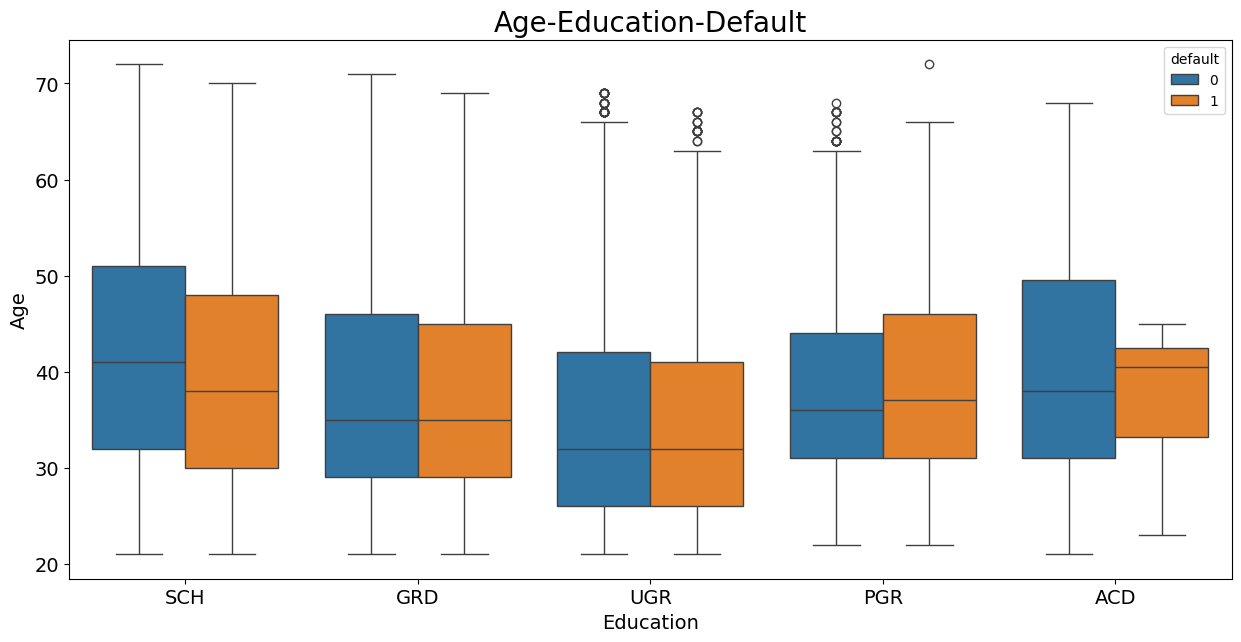

In [23]:
plt.figure(figsize=(15,7))

sns.boxplot(x='education', y='age', hue='default', data=df)

plt.title('Age-Education-Default', fontsize=20)
plt.ylabel('Age',fontsize=14)
plt.xlabel('Education',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [24]:
df.groupby('education')['age'].median()

education
ACD    38.0
GRD    35.0
PGR    36.0
SCH    40.0
UGR    32.0
Name: age, dtype: float64

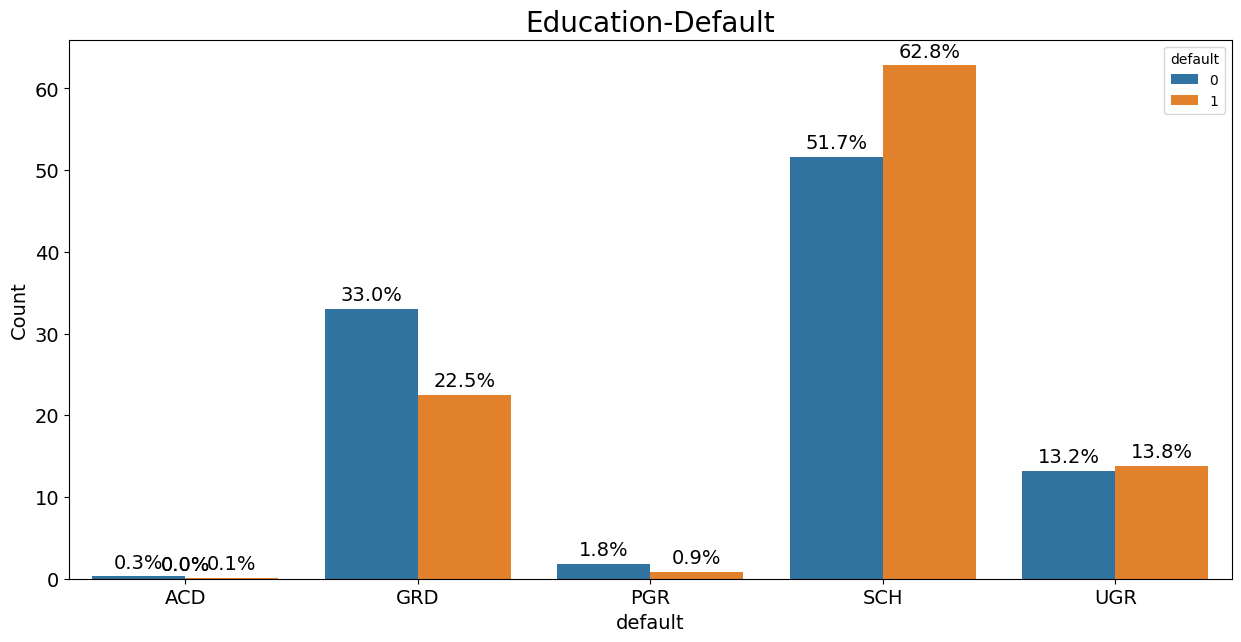

In [25]:
plt.figure(figsize=(15,7))

educ_def = (df.groupby(['default'])['education']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education'))

ax = sns.barplot(x="education", y="percentage",hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

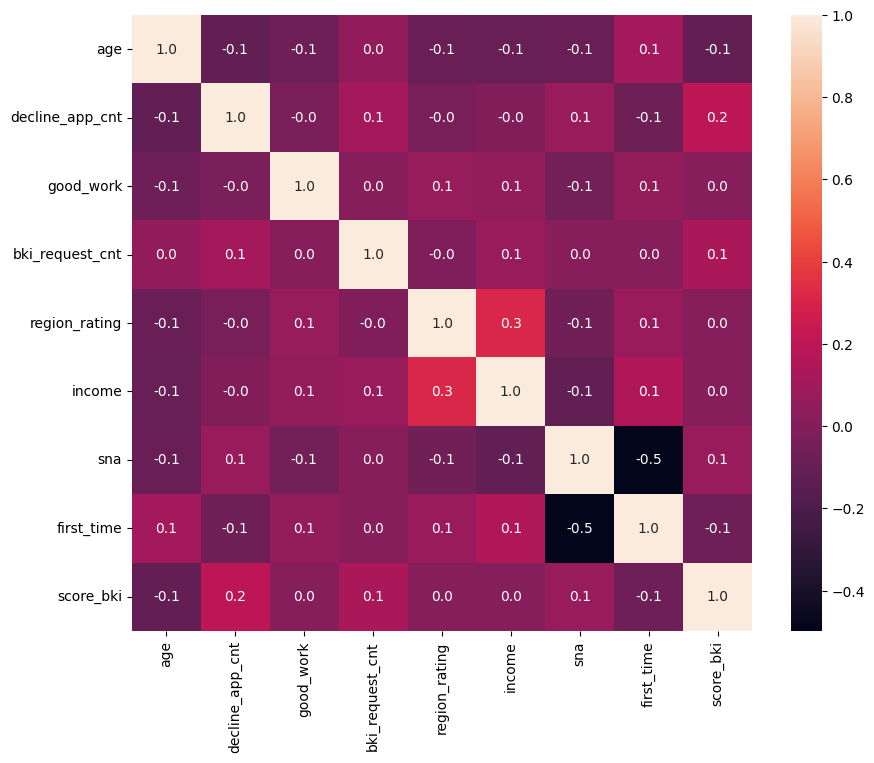

In [26]:
num_cols = ['age', 'decline_app_cnt', 'good_work', 'bki_request_cnt',
            'region_rating', 'income', 'sna', 'first_time', 'score_bki']
plt.figure(figsize=(10,8))

sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

## 2.5 Income

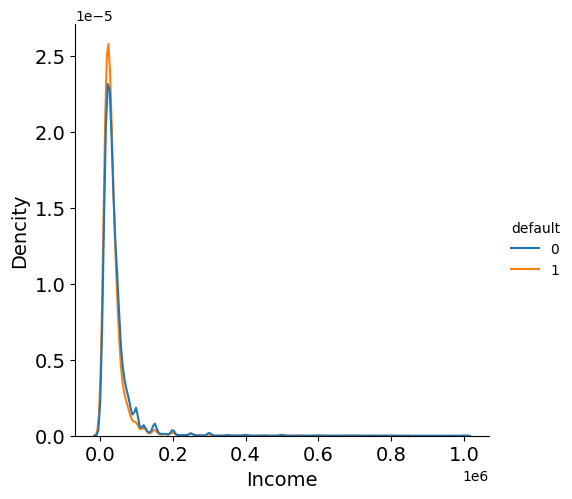

In [27]:
sns.displot(df, x='income', hue='default', kind="kde", common_norm=False)

plt.xlabel('Income', fontsize=14)
plt.ylabel('Dencity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

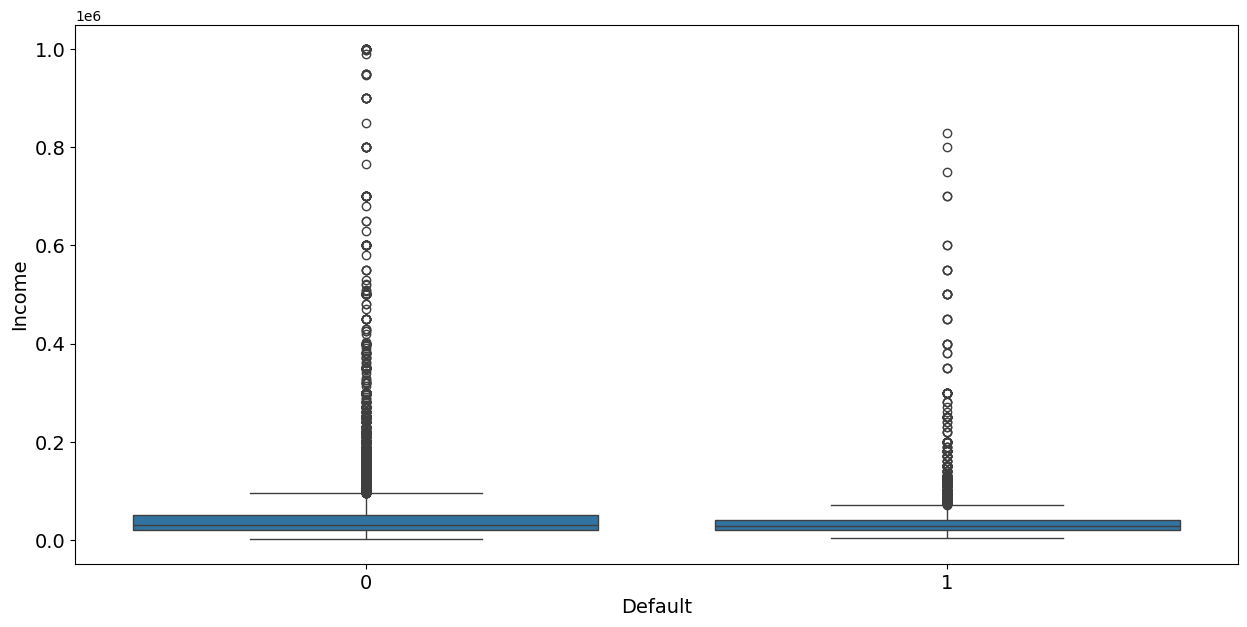

In [28]:
plt.figure(figsize=(15,7))

sns.boxplot(x='default', y='income', data=df)

plt.ylabel('Income', fontsize=14)
plt.xlabel('Default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [29]:
df.groupby('default')['income'].mean()

default
0    41799.713288
1    36288.113316
Name: income, dtype: float64

In [30]:
df.groupby('default')['income'].median()

default
0    30000.0
1    28000.0
Name: income, dtype: float64

In [31]:
df_income = df.copy()
df_income.income = np.log(df.income+1)

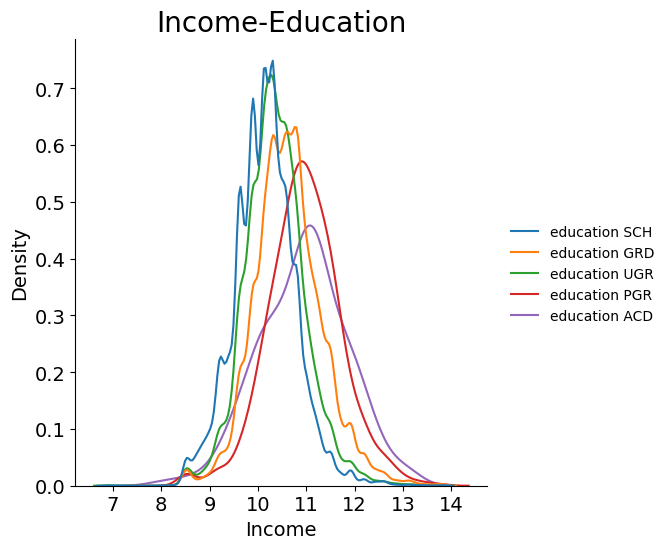

In [32]:
sns.displot(
    {
        "education SCH": df_income[df_income.education == 'SCH'].income,
        "education GRD": df_income[df_income.education == 'GRD'].income,
        "education UGR": df_income[df_income.education == 'UGR'].income,
        "education PGR": df_income[df_income.education == 'PGR'].income,
        "education ACD": df_income[df_income.education == 'ACD'].income,
    },
    kind="kde",
    common_norm=False
)

plt.title('Income-Education', fontsize=20)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

# 3 Feature engineering

In [33]:
df.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

In [34]:
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt',
            'income', 'first_time', 'region_rating']

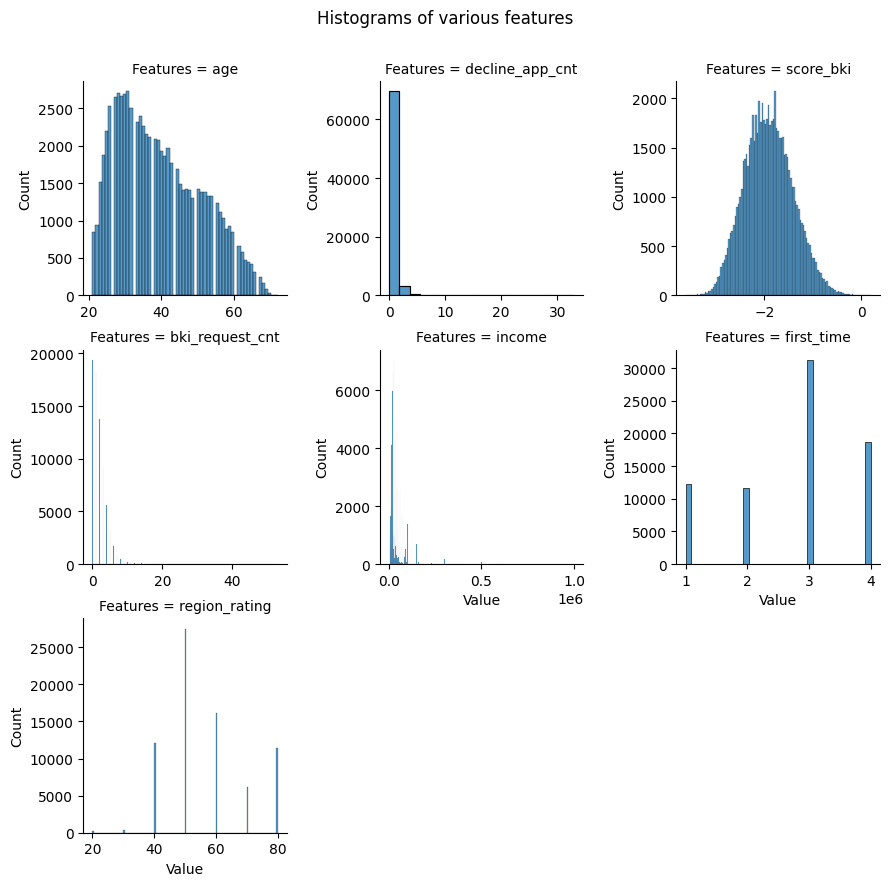

In [35]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                   col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.histplot, "Value")  # Changed displot to histplot

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [36]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    df[i] = np.log(df[i]+1)

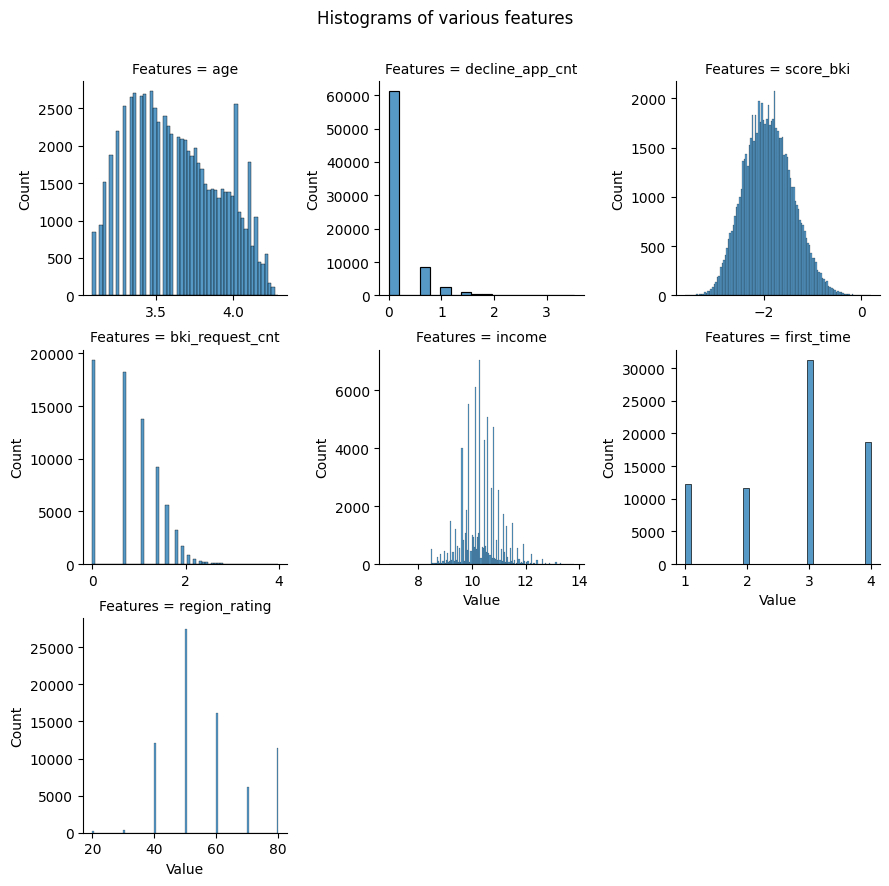

In [37]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                 col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.histplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

generating new features - months

In [38]:
df['app_date'] = pd.to_datetime(df['app_date'], format='%d%b%Y')
df['month'] = df['app_date'].dt.month.astype(object)

df.drop(['app_date'], axis=1, inplace=True)

In [39]:
mean_inc_reg = df.groupby('region_rating')['income'].median().to_dict()
df['mean_inc_reg'] = df['region_rating'].map(mean_inc_reg)

In [40]:
mean_inc_age = df.groupby('age')['income'].median().to_dict()
df['mean_inc_age'] = df['age'].map(mean_inc_age)

In [41]:
mean_bki_age = df.groupby('age')['score_bki'].median().to_dict()
df['mean_bki_age'] = df['age'].map(mean_bki_age)

In [42]:
df[:5]

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address,income,sna,first_time,foreign_passport,default,month,mean_inc_reg,mean_inc_age,mean_bki_age
0,25905,SCH,M,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,...,2,9.798183,4,1,N,0,2,10.126671,9.903538,-1.981476
1,63161,SCH,F,4.094345,N,N,0.000000,0,-1.532276,1.386294,...,3,9.852247,4,1,N,0,3,10.126671,9.998843,-1.994864
2,25887,SCH,M,3.258097,Y,N,1.098612,0,-1.408142,0.693147,...,2,10.308986,1,4,Y,0,2,10.757924,10.308986,-1.814637
3,16222,SCH,F,3.988984,N,N,0.000000,0,-2.057471,1.098612,...,3,9.210440,1,3,N,0,1,10.126671,10.212803,-1.993905
4,101655,GRD,M,3.891820,N,N,0.000000,1,-1.244723,0.693147,...,3,10.308986,1,4,Y,0,4,10.308986,10.308986,-1.988764


In [43]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address',
           'work_address', 'foreign_passport', 'sna', 'month']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   education         73799 non-null  object 
 2   sex               73799 non-null  object 
 3   age               73799 non-null  float64
 4   car               73799 non-null  object 
 5   car_type          73799 non-null  object 
 6   decline_app_cnt   73799 non-null  float64
 7   good_work         73799 non-null  int64  
 8   score_bki         73799 non-null  float64
 9   bki_request_cnt   73799 non-null  float64
 10  region_rating     73799 non-null  int64  
 11  home_address      73799 non-null  object 
 12  work_address      73799 non-null  object 
 13  income            73799 non-null  float64
 14  sna               73799 non-null  int64  
 15  first_time        73799 non-null  int64  
 16  foreign_passport  73799 non-null  object

# 4 Modeling (logistic regression)

In [45]:
df_label = pd.get_dummies(df, columns = cat_cols,
                         drop_first=True).drop('client_id', axis=1)

In [46]:
df_label[:5]

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default,mean_inc_reg,mean_inc_age,...,home_address_3,work_address_2,work_address_3,foreign_passport_Y,sna_2,sna_3,sna_4,month_2,month_3,month_4
0,4.143135,0.000000,-2.008753,0.693147,50,9.798183,1,0,10.126671,9.903538,...,0,1,0,0,0,0,1,1,0,0
1,4.094345,0.000000,-1.532276,1.386294,50,9.852247,1,0,10.126671,9.998843,...,0,0,1,0,0,0,1,0,1,0
2,3.258097,1.098612,-1.408142,0.693147,80,10.308986,4,0,10.757924,10.308986,...,0,1,0,1,0,0,0,1,0,0
3,3.988984,0.000000,-2.057471,1.098612,50,9.210440,3,0,10.126671,10.212803,...,0,0,1,0,0,0,0,0,0,0
4,3.891820,0.000000,-1.244723,0.693147,60,10.308986,4,0,10.308986,10.308986,...,0,0,1,1,0,0,0,0,0,1


In [47]:
X = df_label.drop('default', axis=1)
y = df_label['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

## 4.1 Baseline model

In [48]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [49]:
print('roc-auc', roc_auc_score(y_test, y_score))
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))
print('logloss', log_loss(y_test, y_pred))

roc-auc 0.7292223969235189
precision 0.23103500075108907
recall 0.656423388817755
f1 0.34177777777777774
logloss 11.573040795508401


In [50]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                         precision_score(y_test, y_pred),
                         recall_score(y_test, y_pred),
                         f1_score(y_test, y_pred),
                         log_loss(y_test, y_pred)]

In [51]:
metrics

,Baseline_LR
roc-auc,0.729222
precision,0.231035
recall,0.656423
f1,0.341778
logloss,11.573041


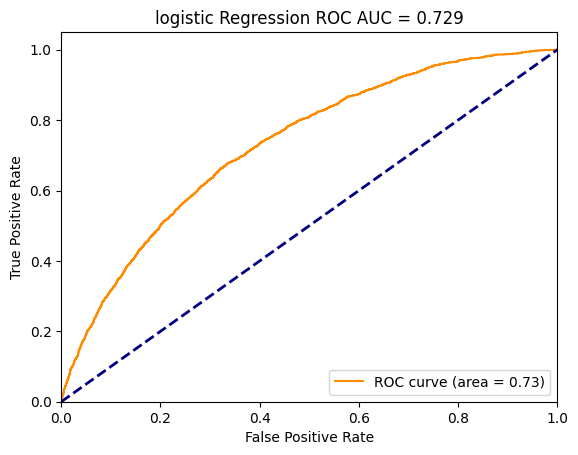

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

# 5 selection of parameters
For obvious reasons, I commented out the grid search. the result is stored in best_params

In [53]:
# parameters_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': np.linspace(1, 1000, num=5),
#     'solver': ['sag', 'saga', 'lbfgs'],
#     'l1_ratio': [0.25, 0.5, 0.75],
#     'max_iter': np.arange(100, 500, 100)
# }

# lr = LogisticRegression(class_weight='balanced')
# cv = StratifiedKFold(n_splits=3, shuffle=True)
# grid_cv = GridSearchCV(lr, parameters_grid,
#                       scoring='roc_auc', cv=cv, verbose=2)

In [54]:
# %%time
# grid_cv.fit(X_train, y_train)

In [55]:
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

In [56]:
# best_params = grid_cv.best_params_

In [57]:
# print(grid_cv.best_estimator_)

In [58]:
best_params = {'C': 750.25, 'l1_ratio': 0.25, 'max_iter': 400, 'penalty': 'l2', 'solver': 'lbfgs'}

In [59]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [60]:
print('roc-auc', roc_auc_score(y_test, y_score_gr))
print('precision', precision_score(y_test, y_pred_gr))
print('recall', recall_score(y_test, y_pred_gr))
print('f1', f1_score(y_test, y_pred_gr))
print('logloss', log_loss(y_test, y_pred_gr))

roc-auc 0.7296667683394826
precision 0.23134664464795077
recall 0.657703798548869
f1 0.3422923145268769
logloss 11.56913362440931


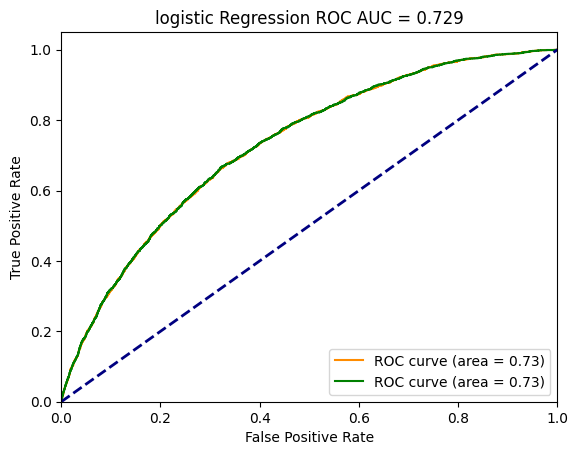

In [61]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

In [62]:
metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                         precision_score(y_test, y_pred_gr),
                         recall_score(y_test, y_pred_gr),
                         f1_score(y_test, y_pred_gr),
                         log_loss(y_test, y_pred_gr)]

In [63]:
metrics[:-1].style.highlight_max(axis=1, color='lightblue')

,Baseline_LR,Grid_LR
roc-auc,0.729222,0.729667
precision,0.231035,0.231347
recall,0.656423,0.657704
f1,0.341778,0.342292


### another hyperparameters search

#### randomsearch

In [64]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)

random_search = RandomizedSearchCV(lr, param_distributions=parameters_grid,
                                   n_iter=100, scoring='roc_auc',
                                   cv=cv, verbose=2, random_state=42)

In [65]:
%%time
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=500.5, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   5.1s
[CV] END C=500.5, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   6.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   5.1s
[CV] END C=1.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   3.9s
[CV] END C=1.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   2.9s
[CV] END C=1.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   2.9s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.75, max_iter=200, penalty=l2, solver=lbfgs; total time=   1.2s
[CV]

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=100,
                   param_distributions={'C': array([   1.  ,  250.75,  500.5 ,  750.25, 1000.  ]),
                                        'l1_ratio': [0.25, 0.5, 0.75],
                                        'max_iter': array([100, 200, 300, 400]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['sag', 'saga', 'lbfgs']},
                   random_state=42, scoring='roc_auc', verbose=2)

In [66]:
print(random_search.best_score_)
print(random_search.best_params_)

0.7361236128349308
{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'l1_ratio': 0.75, 'C': 1.0}


In [67]:
best_params = random_search.best_params_

In [68]:
lr_rand = LogisticRegression(**best_params, class_weight='balanced')
lr_rand.fit(X_train, y_train)

y_pred_rand = lr_gr.predict(X_test)
y_score_rand = lr_gr.predict_proba(X_test)[:,1]

In [69]:
print('roc-auc', roc_auc_score(y_test, y_score_rand))
print('precision', precision_score(y_test, y_pred_rand))
print('recall', recall_score(y_test, y_pred_rand))
print('f1', f1_score(y_test, y_pred_rand))
print('logloss', log_loss(y_test, y_pred_rand))

roc-auc 0.7296667683394826
precision 0.23134664464795077
recall 0.657703798548869
f1 0.3422923145268769
logloss 11.56913362440931


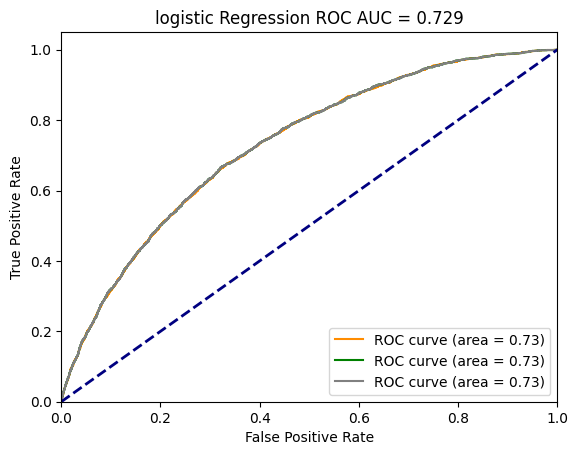

In [70]:
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_score_rand)

roc_auc_3 = auc(fpr_3, tpr_3)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot(fpr_3, tpr_3, color = 'grey', label = 'ROC curve (area = %0.2f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

In [71]:
metrics['Rand_LR'] = [roc_auc_score(y_test, y_score_rand),
                         precision_score(y_test, y_pred_rand),
                         recall_score(y_test, y_pred_rand),
                         f1_score(y_test, y_pred_rand),
                         log_loss(y_test, y_pred_rand)]

In [72]:
metrics[:-1].style.highlight_max(axis=1, color='lightblue')

,Baseline_LR,Grid_LR,Rand_LR
roc-auc,0.729222,0.729667,0.729667
precision,0.231035,0.231347,0.231347
recall,0.656423,0.657704,0.657704
f1,0.341778,0.342292,0.342292


# 6 Important features analysis

In [75]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.0 MB/s eta 0:00:00


In [76]:
import shap

In [77]:
explainer = shap.LinearExplainer(lr_gr, X_train, feature_dependence='independent')
shap_values = explainer(X_test)

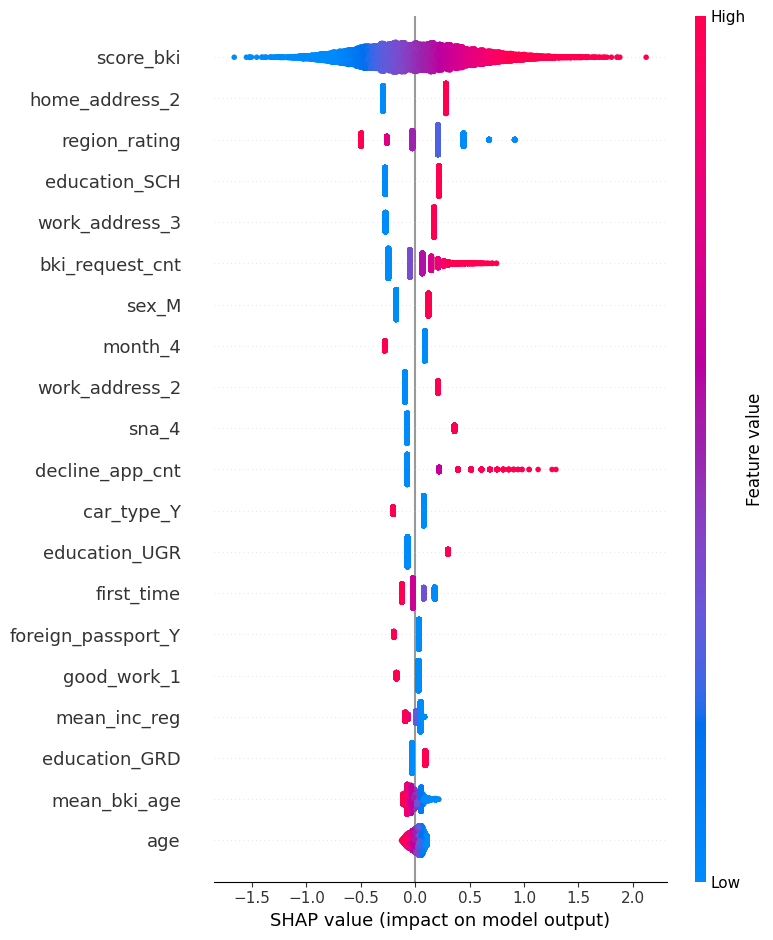

In [78]:
shap.summary_plot(shap_values, X_test)

# Log reg coefficients

In [79]:
lr_gr.coef_

array([[-0.19207877,  0.42483177,  0.99659296,  0.28384174, -0.02350366,
        -0.03735039, -0.10081096, -0.22497775,  0.34635941, -0.83016438,
         0.12083725, -0.05317971,  0.49363213,  0.37209453,  0.29655843,
         0.0031626 , -0.280725  , -0.20260318,  0.57679819,  0.11583531,
         0.30422891,  0.4482466 , -0.23104444,  0.25795536,  0.15651029,
         0.43562508, -0.01934277, -0.06148689, -0.3680088 ]])

In [80]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)

In [81]:
feature_imp

,feature,imp
2,score_bki,0.996593
18,home_address_2,0.576798
12,education_SCH,0.493632
21,work_address_3,0.448247
25,sna_4,0.435625
1,decline_app_cnt,0.424832
13,education_UGR,0.372095
8,mean_inc_age,0.346359
20,work_address_2,0.304229
14,sex_M,0.296558


In [82]:
df_label.groupby('default')[['score_bki']].median()

,score_bki
default,
0,-1.956982
1,-1.683857


In [83]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_train

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name', 'feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

In [84]:
cols_show = list(set(feature_importance.col_name[:15]) & set(num_cols))

In [85]:
cols_show

['score_bki',
 'bki_request_cnt',
 'first_time',
 'region_rating',
 'decline_app_cnt']

In [87]:
df_label[cols_show + ['default']].groupby('default')[cols_show].mean().T

default,0,1
score_bki,-1.938048,-1.675637
bki_request_cnt,0.858317,1.013421
first_time,2.806106,2.486022
region_rating,57.169044,53.677977
decline_app_cnt,0.135281,0.270484
